# Projeto final: Como usar teoria da informação para caracterizar redes? - Redes Complexas (SME0130)
---

Alunos: 

Guilherme Santana de Almeida, N° USP: 12694668

Rafael Fernando Gigante, N° USP: 12610500

---
Prof. Dr. Francisco Aparecido Rodrigues

## Introdução ##

Neste projeto, reproduziremos o artigo *"A detailed characterization of complex networks using Information Theory, (2019)"*, que pode ser acessado no seguinte link: [https://www.nature.com/articles/s41598-019-53167-5](https://www.nature.com/articles/s41598-019-53167-5). 

No artigo, os autores utilizam duas medidas para caracterizarem as redes: Entropia de Shannon $\mathcal{H}$ e a Medida de Informação de Fisher $\mathcal{F}$. A Entropia de Shannon é uma medida global da desordem de um sistema, sendo insensível à pequenas mudanças ocorrendo em uma região pequena do espaço. Já a Medida de Informação de Fisher é uma medida local que é interpretada como a quantidade de informação que pode ser extraída de um conjunto de medidas e também o estado de desordem do sistema. No trabalho é proposto a utilização do plano Shannon-Fisher como uma alternativa ao plano Entropia-Complexidade para a caracterização de redes. As análises feitas no artigo foram feitas para redes sintéticas e redes do mundo real.



## Metodologia ##

### Definição de rede ###

Um grafo $G(N,M)$, onde $N$ é o número de vértices e $M$ o número de vértices, é assumido como um modelo adequado para representar uma rede. O grafo é representado pela sua matrix de adjacência $\textbf{A}$ com dimensão $N \times N$, os seus elementos são $a_{ij} = 1$ se existe uma aresta entre os vértices $i$ e $j$ e $a_{ij} =0$ caso contrário. Os grafos considerados são não direcionados, sem peso e não possuem a presença de auto-loops. O grau de cada vértice é dado por $k_i = \sum_{j=1}^{N} a_{ij}$.

### Entropia da Rede ###

A Entropia da Rede é uma medida baseada na Entropia de Shannon. Ela é baseada na probabilidade de um caminhante aleatório ir de um vértice $i$ para outro vértice $j$. Essa distribuição de probabilidade é definida para cada um dos vértices e é dada por:
$$
p_{i \rightarrow j} = 
\begin{cases}
0, \text{se } a_{ij} = 0,\\
1/k_i, \text{se } a_{ij} = 1.
\end{cases}
$$

Para cada vértice essa distribuição está normalizada, sendo fácil de ver que  $\sum_{j} p_{i \rightarrow j} = 1\$.

Para cada um dos vértices, definimos sua entropia como
$$
{{\mathscr{S}}}^{(i)}\equiv {\mathscr{S}}[{P}^{(i)}]=-\,\mathop{\sum }\limits_{j=1}^{N-1}\,{p}_{i\to j}\,\mathrm{ln}\,{p}_{i\to j}=\,\mathrm{ln}\,{k}_{i}.
$$

Normalizamos a entropia de cada vértice tomando
$$
{ {\mathcal H} }^{(i)}=\frac{{\mathscr{S}}[{P}^{(i)}]}{\mathrm{ln}(N-1)}=\frac{\mathrm{ln}\,{k}_{i}}{\mathrm{ln}(N-1)}.
$$

Desse modo, têm-se que a Entropia de Rede é dada pela média da entropia de cada um dos vértices sobre toda a rede, ou seja,
$$
{\mathcal H} =\frac{1}{N}\mathop{\sum }\limits_{i=1}^{N}\,{ {\mathcal H} }^{(i)}=\frac{1}{N\,\mathrm{ln}(N-1)}\mathop{\sum }\limits_{i=1}^{N}\,\mathrm{ln}\,{k}_{i}.
$$

A entropia é máxima ($\mathcal{H}$) para redes completamente conectadas. Assim, quanto menos conectada for a rede, menor será sua Entropia. Portanto, a Entropia de Rede quantifica a heterogenidade da distribuição de graus da rede, com valores menores para vértices com grau baixo e valores maiores para vértices com grau alto.

### Medida de Informação de Fisher ###

A Medida de Informação de Fisher normalizada para um dado vértice $i$ é dada por
$$
\begin{split}
{ {\mathcal F} }^{(i)}[{P}^{(i)}] &=\frac{1}{2}\mathop{\sum }\limits_{j=1}^{N-1}\,{[\sqrt{{p}_{i\to j+1}}-\sqrt{{p}_{i\to j}}]}^{2} \\
&= \frac{1}{2}\mathop{\sum }\limits_{j=1}^{N-1}\,{[\sqrt{{p}_{i\to j+1}}-\sqrt{{p}_{i\to j}}]}^{2} \\
&= \frac{1}{2}\mathop{\sum }\limits_{j=1}^{N-1}\,{\frac{1}{k_i}[\sqrt{{a}_{i j+1}}-\sqrt{{a}_{ij}}]^{2}}.
\end{split}
$$

Assim, a Medida de Informação de Fisher normalizada para toda a rede é dada pela média sobre todos os vértices, ou seja,
$$
\begin{split}
{\mathcal F} &=\frac{1}{N}\sum _{i=1}\,{ {\mathcal F} }^{(i)}[{P}^{(i)}] \\
&= \frac{1}{N}\sum _{i} ^{N}\,\frac{1}{2}\mathop{\sum }\limits_{j=1}^{N-1}\,{\frac{1}{k_i}[\sqrt{{a}_{i j+1}}-\sqrt{{a}_{ij}}]^{2}}] \\
&= \frac{1}{2N}\sum _{i} ^{N}\,\frac{1}{k_i}\mathop{\sum }\limits_{j=1}^{N-1}\,{[\sqrt{{a}_{i j+1}}-\sqrt{{a}_{ij}}]^{2}}].
\end{split}
$$

Se o sistema a ser estudado estiver em um estado ordenado, ou seja, uma rede esparsa, quase todos os valores de $p_{i \to j}$ serão nulos e teremos $\mathcal{F} \rightarrow 1$. Por outro lado, para uma rede altamente conectada, temos que quase todos os valores de $p_{i \to j}$ são similares, de modo que $\mathcal{F} \rightarrow 0$.


## Bibliotecas ##

In [124]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Medidas ##

In [125]:
# Shannon entropy 'H'
def shannon_entropy(G):
    # Calculate degree sequence for each node and filter only positive terms
    degree_sequence = [degree for node, degree in G.degree()]

    #Number of nodes in the network
    N = len(G.nodes())

    #Normalized entropy
    if N >= 3:
      entropy = (1/(N * np.log(N-1))) * np.sum(np.log(degree_sequence))
    else:
      entropy = 0

    return entropy

In [126]:
# Fisher information measure 'F'
def fisher_information(G):
  # Calculate degree sequence for each node and filter only positive terms
  degree_sequence = [degree for node, degree in G.degree()]

  #Number of nodes in the network
  N = len(G.nodes())

  # Get the adjacency matrix
  adjacency_matrix = nx.adjacency_matrix(G).todense()

  if N >= 2:
    F = 0
    for i in range(N):
      aux = 0
      for j in range(N-1):
        aux += (adjacency_matrix[i,j+1] - adjacency_matrix[i,j]) ** 2
      F += (1 / degree_sequence[i]) * aux
    F = F / (N * 2)
  else:
    F = 0

  return F

## Funções geradoras de redes ##

In [127]:
# Generate Erdős-Rényi graph with n nodes and probability p of edge creation
def generate_erdos_renyi(n, p):
    G = nx.erdos_renyi_graph(n, p)

    # Simplifying the network by considering only the largest component
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    return G

In [128]:
# Generate Watts-Strogatz graph by creating a ring with n nodes, where each node is joined with its k nearest neighbors, then we
# rewire each edge with probability p
def generate_watts_strogatz(n, k, p):
    G = nx.watts_strogatz_graph(n, k, p)

    # Simplifying the network by considering only the largest component
    G.remove_edges_from(nx.selfloop_edges(G))
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    return G

In [129]:
# Generate a Barabasi-Albert network preferential attachment
def generate_barabasi_albert(n, m):
    G = nx.barabasi_albert_graph(n, m)

    # Simplifying the network by considering only the largest component
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    return G

In [130]:
# Generate a Barabasi-Albert network using non-linear preferential attachment
def generate_barabasi_albert_nonlinear(n, m, alpha):
    G = nx.complete_graph(m)

    # List to store the "degree" of nodes
    node_degrees = list(G.degree())

    for i in range(m, n):
        new_edges = set()
        while len(new_edges) < m:
            # Get the node degrees
            degrees = np.array([d ** alpha for n, d in node_degrees])
            # Normalize the degrees
            if alpha == 1:
              probs = degrees / degrees.sum()  # Linear preferential attachment
            else:
              probs = np.power(degrees, alpha)
              probs = probs / np.sum(probs)
            # Choose a node based on non-linear preferential attachment
            chosen_node = np.random.choice(range(len(node_degrees)), p=probs)
            new_edges.add(chosen_node)

        # Add the new node with edges to the chosen nodes
        G.add_node(i)
        G.add_edges_from((i, chosen_node) for chosen_node in new_edges)

        # Update the node_degrees list
        node_degrees.append((i, m))
        for chosen_node in new_edges:
            node_degrees[chosen_node] = (chosen_node, node_degrees[chosen_node][1] + 1)
    
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    return G

In [131]:
# Function to generate a power-law degree sequence
def generate_power_law_sequence(num_nodes, exponent, min_degree):
  degrees = np.random.zipf(exponent, num_nodes)
  # Ensure minimum degree is met
  degrees = np.maximum(degrees, min_degree)
  return degrees

In [198]:
# Generate a network using the configuration model
def generate_configuration_model(N, gama):
  # Parameters
  num_nodes = N  # Number of nodes in the network
  exponent = gama  # Exponent for the power-law distribution
  min_degree = 1  # Minimum degree for each node

  # Generate a power-law degree sequence
  degree_sequence = generate_power_law_sequence(num_nodes, exponent, min_degree)

  # Ensure the degree sequence sum is even
  if sum(degree_sequence) % 2 != 0:
      degree_sequence[0] += 1

  # Generate the configuration model network
  G = nx.configuration_model(degree_sequence)

  # Convert to a simple graph (no self-loops or parallel edges)
  G = nx.Graph(G)
  G.remove_edges_from(nx.selfloop_edges(G))
  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gcc[0])
  G = nx.convert_node_labels_to_integers(G, first_label=0)
    
  return G

In [133]:
#Generate a Bianconi-Barabasi network
def generate_bianconi_barabasi(n, m):
    fitness = np.random.uniform(0, 1, n)

    G = nx.Graph()

    # Initialize with a single node
    G.add_node(0, fitness=fitness[0])

    # Attach the next node to the initial node
    G.add_node(1, fitness=fitness[1])
    G.add_edge(0, 1)

    for new_node in range(2, n):
        G.add_node(new_node, fitness=fitness[new_node])

        # Calculate the probability of attaching to each existing node
        degrees = np.array([G.degree(v) for v in G.nodes()])
        total_sum = sum([degrees[i] * fitness[i] for i in G.nodes()])
        probabilities = [(degrees[i] * fitness[i]) / total_sum for i in G.nodes()]

        # Choose m nodes to connect to
        targets = set()
        while len(targets) < m:
            chosen = np.random.choice(G.nodes(), p=probabilities)
            targets.add(chosen)

        # Create edges between the new node and the selected targets
        for target in targets:
            G.add_edge(new_node, target)
            
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    return G

In [176]:
# Generate a Barabási-Albert network with aging property.
def barabasi_albert_with_aging(n, m, aging_factor):
    # Create an empty graph
    G = nx.Graph()
    
    # Add the initial m nodes
    G.add_nodes_from(range(m))
    
    # List to store the age of nodes
    node_ages = [0] * m
    
    # Initialize the target list for preferential attachment
    targets = list(range(m))
    
    for i in range(m, n):
        # Calculate the probabilities for each target node
        node_probs = []
        for node in targets:
            degree = max(len(list(G.neighbors(node))), 1)  # Ensure degree is at least 1 to avoid division by zero
            age_influence = 1 / ((node_ages[node] + 1) ** aging_factor)
            prob = age_influence / degree
            node_probs.append((node, prob))
        
        # Normalize probabilities
        total_sum = sum(prob for _, prob in node_probs)
        node_probs = [(node, prob / total_sum) for node, prob in node_probs]
        
        # Choose m targets based on the computed probabilities
        chosen_nodes = set()
        while len(chosen_nodes) < m:
            chosen_nodes.add(random.choices([node for node, _ in node_probs],
                                            weights=[prob for _, prob in node_probs])[0])
        
        # Add the new node
        G.add_node(i)
        
        # Add edges
        for target in chosen_nodes:
            G.add_edge(i, target)
            targets.append(target)
            node_ages[target] += 1  # Increase the age of the target node
        
        # Add the new node to the targets list
        targets.extend([i] * m)
        node_ages.append(0)  # Age of the new node is 0
    
    return G

## Resultados: Redes Sintéticas ##

### Erdős-Rényi: redes aleatórias ###

Um grafo aleatório definido pelo modelo de Erdõs-Rényi é dado por $G_{Np}$, onde $N$ representa o número de vértices da rede e $p$ a probabilidade de conexão entre os vértices. Aqui, nós analisamos o comportamento de dez grafos ER independentes gerados a partir de todas as combinações de $N = \{50, 10^2, 10^3\}$ e $p \in \{0, 0.01, 0.02, \dots, 0.99, 1\}$.



In [134]:
#Generate the networks and make the measures
n = [50, 100, 10**3]
p = np.arange(0.00, 1.01, 0.01)

link_density = [[], [], []]
network_entropy = [[], [], []]
fisher_information_measure = [[], [], []]

for i in range(len(n)):
  for j in p:
    for k in range(10):
      G = generate_erdos_renyi(n[i], j)
      link_density[i].append(nx.density(G))
      network_entropy[i].append(shannon_entropy(G))
      fisher_information_measure[i].append(fisher_information(G))

er_link_density = np.array(link_density)
er_network_entropy = np.array(network_entropy)
er_fisher_information_measure = np.array(fisher_information_measure)

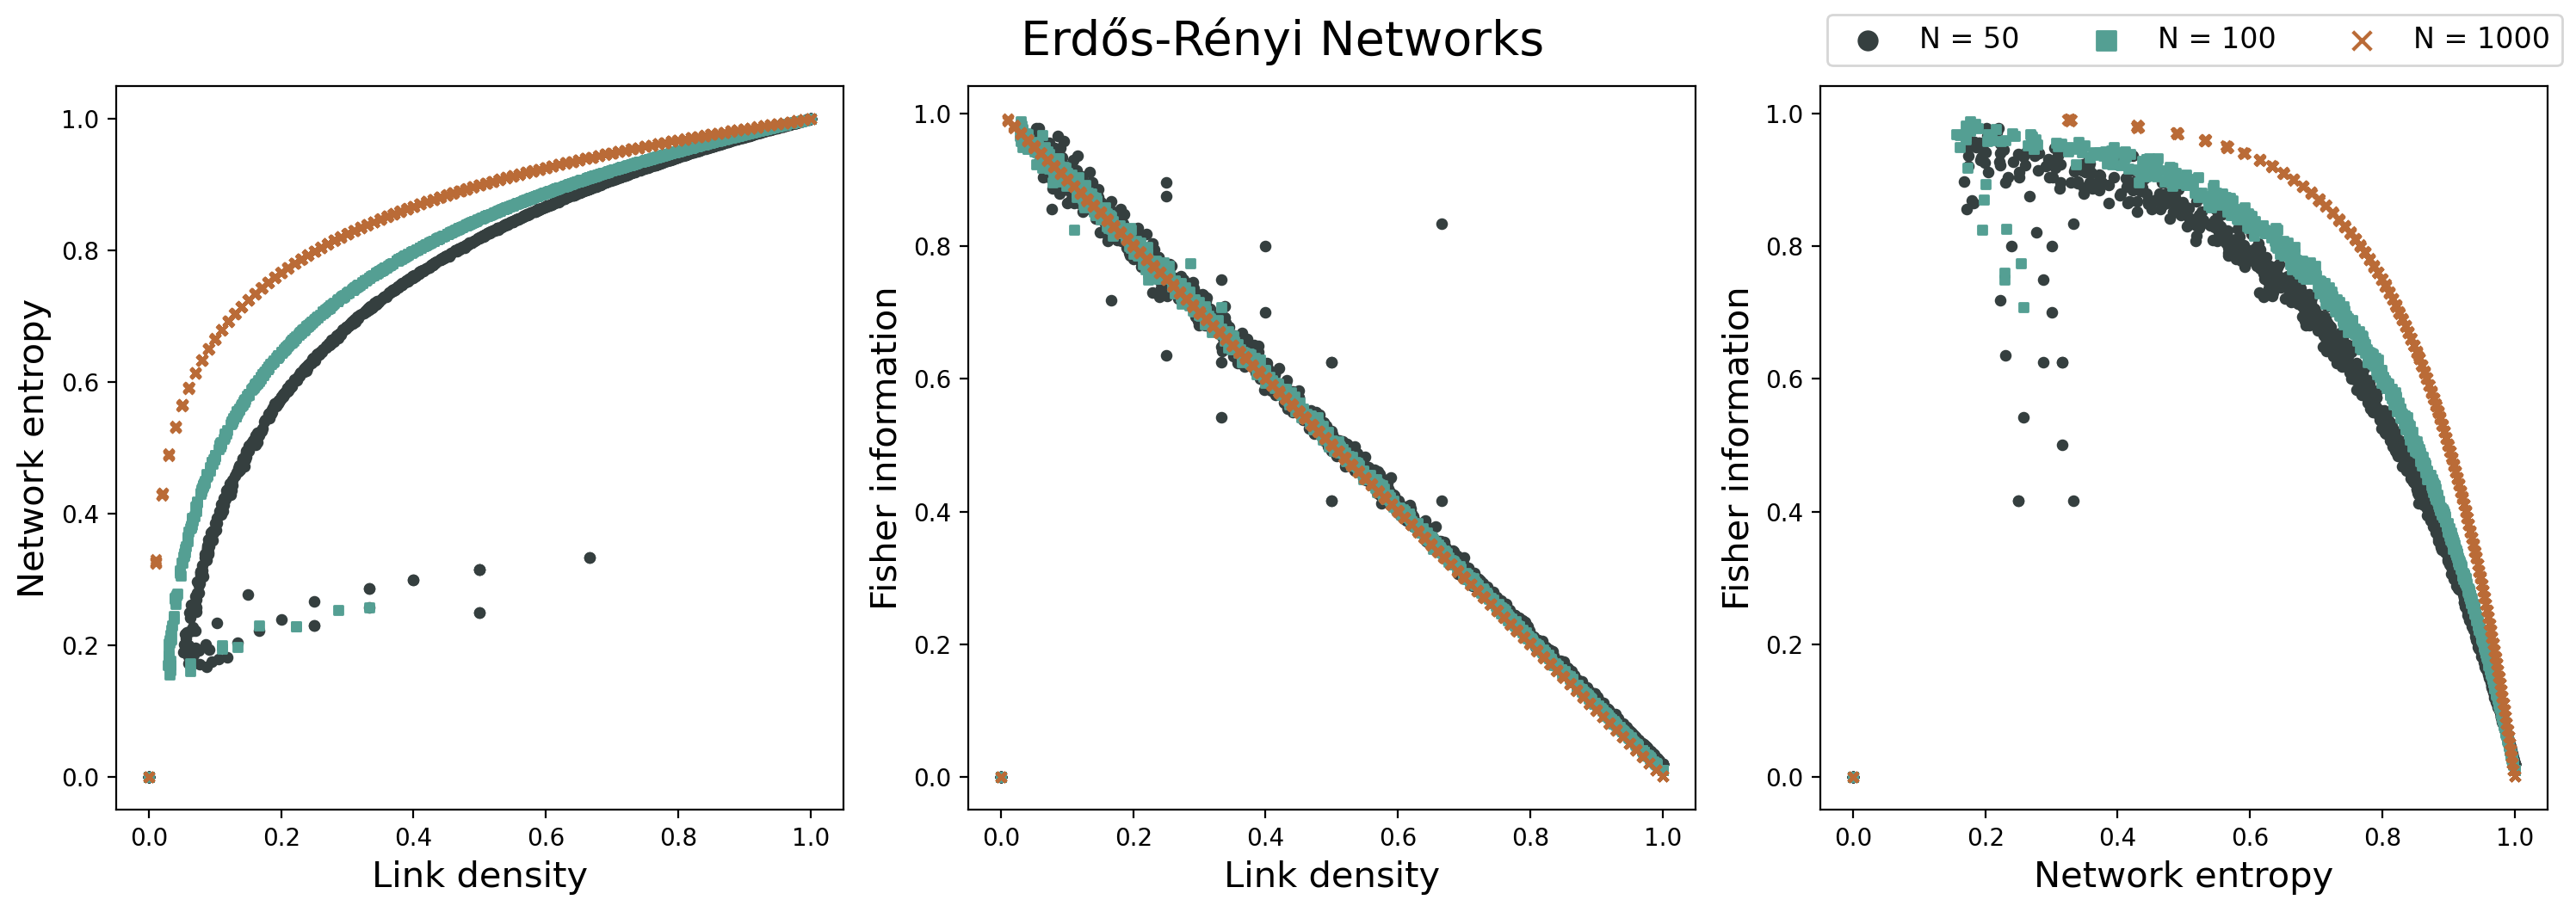

In [167]:
#Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=200)

axes[0].scatter(er_link_density[0], er_network_entropy[0], label=f'N = {n[0]}', color="#353F3F", marker='o', s=15)
axes[0].scatter(er_link_density[1], er_network_entropy[1],label=f'N = {n[1]}', color= "#549F93", marker='s', s=15)
axes[0].scatter(er_link_density[2], er_network_entropy[2],label=f'N = {n[2]}', color="#BA6B37", marker='x', s=15)
axes[0].set_xlabel(r'Link density', fontsize=15)
axes[0].set_ylabel(r'Network entropy', fontsize=15)


axes[1].scatter(er_link_density[0], er_fisher_information_measure[0], color="#353F3F",  marker='o', s=15)
axes[1].scatter(er_link_density[1], er_fisher_information_measure[1], color="#549F93", marker='s', s=15)
axes[1].scatter(er_link_density[2], er_fisher_information_measure[2], color="#BA6B37", marker='x', s=15)
axes[1].set_xlabel(r'Link density', fontsize=15)
axes[1].set_ylabel(r'Fisher information', fontsize=15)

axes[2].scatter(er_network_entropy[0], er_fisher_information_measure[0], color="#353F3F", marker='o', s=15)
axes[2].scatter(er_network_entropy[1], er_fisher_information_measure[1], color="#549F93", marker='s', s=15)
axes[2].scatter(er_network_entropy[2], er_fisher_information_measure[2], color="#BA6B37", marker='x', s=15)
axes[2].set_xlabel(r'Network entropy', fontsize=15)
axes[2].set_ylabel(r'Fisher information', fontsize=15)

plt.tight_layout()
fig.suptitle(r'Erdős-Rényi Networks',y=1.05 ,fontsize=20)
fig.legend(loc='upper right', ncol=3,  prop={'size': 12}, markerscale=2)
plt.show()

No primeiro gráfico, vemos a variação da Entropia de Shannon $\mathcal{H}$ com respeito a densidade de conexões $\xi$. A variação começa bem inclinada e então começa a saturar. Essa relação também depende do número de vértices $N$, onde podemos notar que a taxa de crescimento aumenta com $N$.

Na segunda figura, vemos a relação da Medida de Informação de Fisher como função da densidade conexões. Vemos que a medida decai de forma linear e apresenta o mesmo comportamento para os três valores de $N$.

Já na última figura obtemos a relação dessas duas medidas. Vemos que quanto maior o valor de $N$, menor é a variabilidade observada. Isso sugere a utilização de $N = 10^3$ nas próximas medidas, no entanto, por questões de custo computacional, utilizaremos $N = 10^2$ daqui em diante.

Abaixo, é a ilustrada a relação dessas três medidas em um único gráfico 3D.

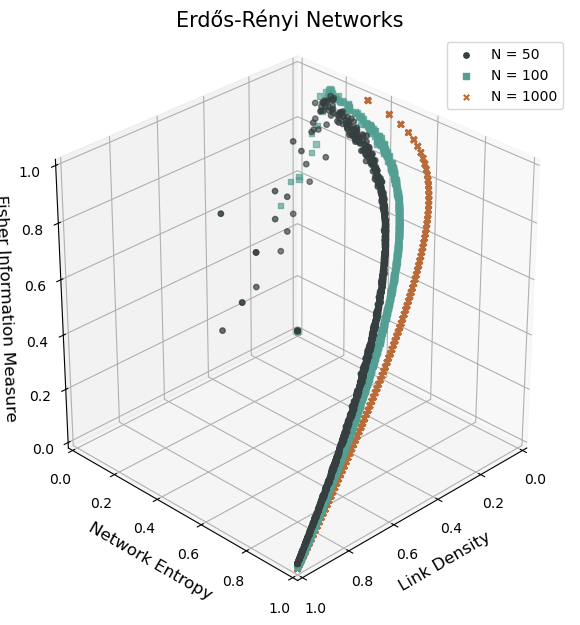

In [136]:
# Creates a 3D plot with the previous results
fig = plt.figure(figsize=(21, 7), dpi=100)

# Add 3D subplot with adjusted size
ax = fig.add_subplot(111, projection='3d')

ax.scatter(er_link_density[0], er_network_entropy[0], er_fisher_information_measure[0], c="#353F3F", s=15, marker='o', label=f'N = {n[0]}')
ax.scatter(er_link_density[1], er_network_entropy[1], er_fisher_information_measure[1], c="#549F93", s=15, marker='s', label=f'N = {n[1]}')
ax.scatter(er_link_density[2], er_network_entropy[2], er_fisher_information_measure[2], c="#BA6B37", s=15, marker='x', label=f'N = {n[2]}')
ax.view_init(30, 45)
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)
ax.set_zlim(bottom=0, top=1)
ax.set_xlabel(r'Link Density', fontsize=12)
ax.set_ylabel(r'Network Entropy',fontsize=12)
ax.set_zlabel(r'Fisher Information Measure', fontsize=12)
ax.set_aspect('equal')
ax.set_title(r'Erdős-Rényi Networks', fontsize=15)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.legend()
plt.show()

### Watts-Strogatz: redes de pequeno mundo ###

Dado o número de vértices $N$ e o grau médio $K$ e um parâmetro $\beta \in [0,1]$, podemos construir um grafo $G_{NK}$ que reproduz a propriedade de pequeno mundo da seguinte forma. Inicia-se com uma rede em anel, com cada um dos $N$ vértices conectados com os seus $K$ vizinhos mais próximos. Então, para cada um dos vértices, removemos suas conexões existentes e o conectamos com outro vértice aleatório com probabilidade $\beta$. Quando $\beta = 0$ temos uma rede em anel regular, já para $\beta = 1$ temos um grafo completamente aleatório. Para valores intermediários obtemos redes que possuem a característica de pequeno mundo.
 
 Para esse caso, utilizamos um número de vértices $N = 10^2$ fixo, variamos o número médio de conexões $K \in \{2,3,4, \dots, 500 \}$ e a probabilidade de reconexão $\beta \in \{0, 0.01, 0.02, \dots, 0.99, 1 \}$.

In [140]:
N = 100
k = np.arange(2,100,1)
p = np.arange(0.00, 1.01, 0.01)

link_density = []
network_entropy = []
fisher_information_measure = []

for j in p:
  aux = []
  aux2 = []
  aux3 = []
  for l in k:
    G = generate_watts_strogatz(N,l, j)
    aux.append(nx.density(G))
    aux2.append(shannon_entropy(G))
    aux3.append(fisher_information(G))
  link_density.append(aux)
  network_entropy.append(aux2)
  fisher_information_measure.append(aux3)

ws_link_density = np.array(link_density)
ws_network_entropy = np.array(network_entropy)
ws_fisher_information_measure = np.array(fisher_information_measure)

shape_ws = ws_link_density.shape[0]

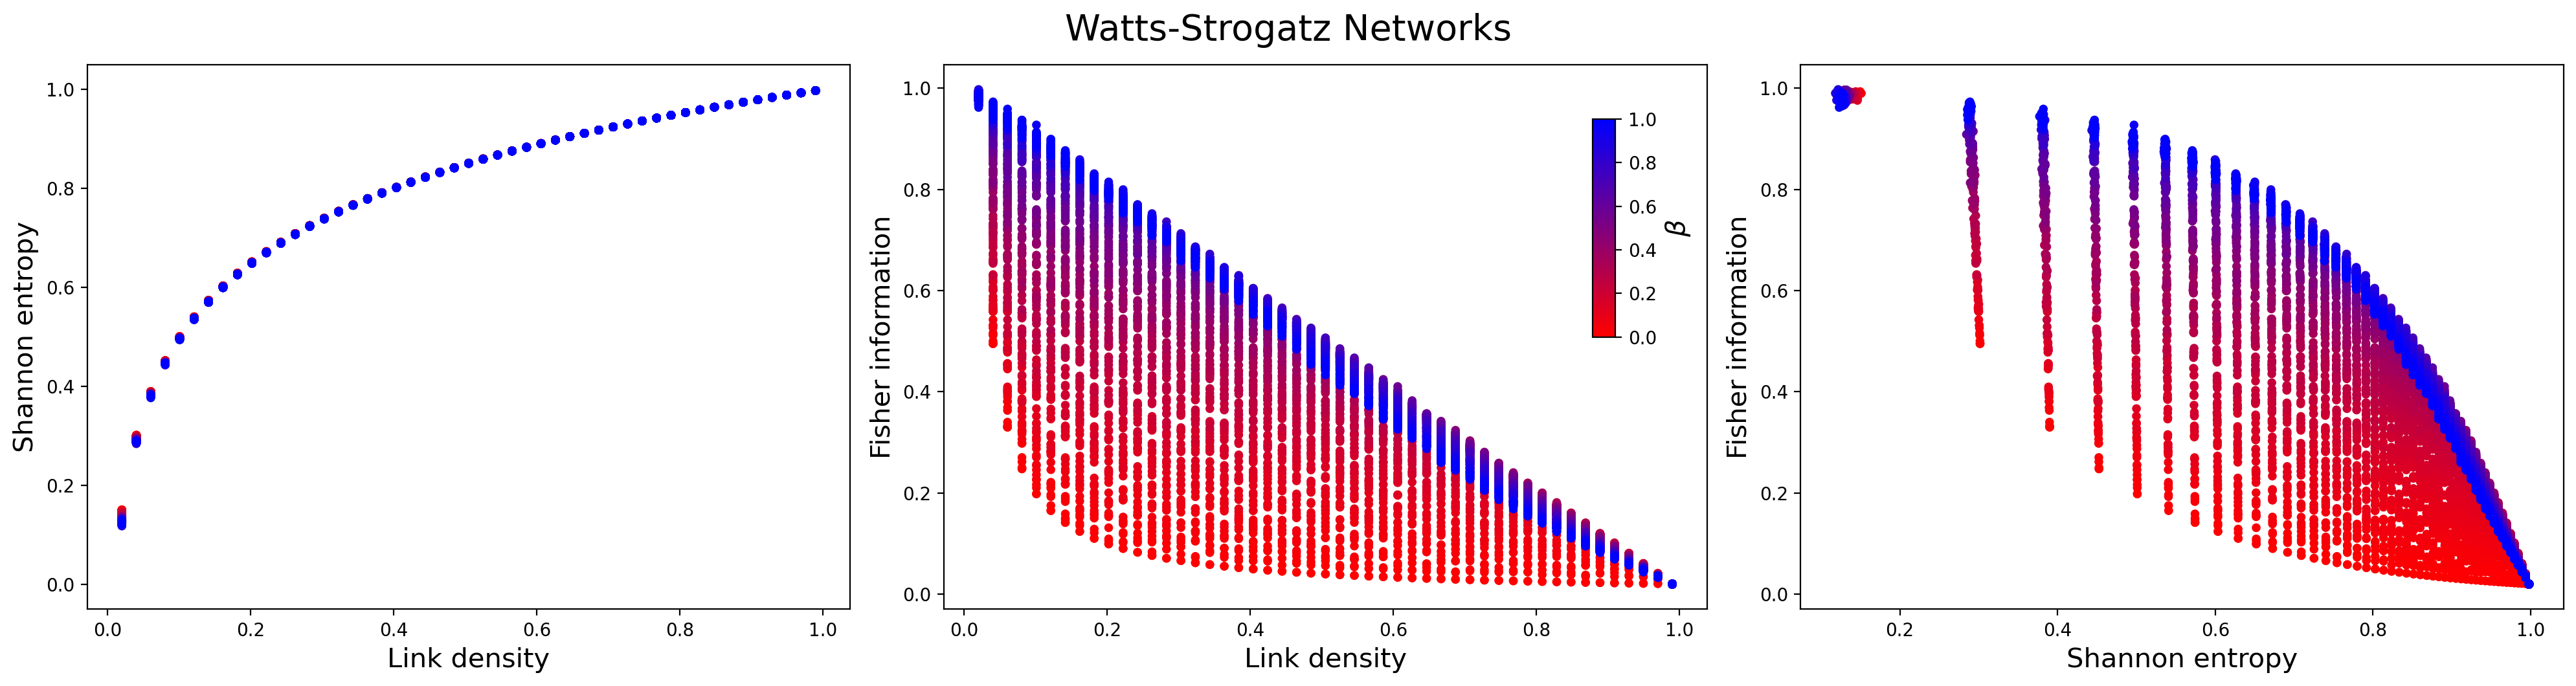

In [168]:
colors = [(1, 0, 0), (0, 0, 1)]  # R -> B
n_bins = 100
cmap_name = 'red_blue'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

for i in range(ws_link_density.shape[0]):
    scatter = axes[0].scatter(ws_link_density[i,:], ws_network_entropy[i, :], c=np.full(ws_link_density.shape[1], p[i]), s = 15,
                         cmap=custom_cmap, vmin=0, vmax=1)
axes[0].set_xlabel(r'Link density', fontsize=15)
axes[0].set_ylabel('Shannon entropy', fontsize=15)
axes[0].set_ylim(-0.05,1.05)


for i in range(ws_link_density.shape[0]):
    scatter = axes[1].scatter(ws_link_density[i,:], ws_fisher_information_measure[i, :], c=np.full(ws_link_density.shape[1], p[i]), s = 15,
                         cmap=custom_cmap, vmin=0, vmax=1)
axes[1].set_xlabel(r'Link density', fontsize=15)
axes[1].set_ylabel(r'Fisher information', fontsize=15)

for i in range(ws_link_density.shape[0]):
    scatter = axes[2].scatter(ws_network_entropy[i, :], ws_fisher_information_measure[i, :] ,c=np.full(ws_link_density.shape[1], p[i]), s = 15,
                         cmap=custom_cmap, vmin=0, vmax=1)
axes[2].set_xlabel(r'Shannon entropy', fontsize=15)
axes[2].set_ylabel(r'Fisher information', fontsize=15)

plt.tight_layout()
fig.suptitle(r'Watts-Strogatz Networks',y=1.05 ,fontsize=20)
cax = inset_axes(axes[1], width="3%", height="40%", loc='lower left', bbox_to_anchor=(0.85, 0.5, 1, 1),
                   bbox_transform=axes[1].transAxes, borderpad=0)
color_bar = fig.colorbar(scatter, cax=cax)
color_bar.set_label(r'$\beta$', fontsize=15)
plt.show()

Na primeira figura, podemos observar que há muita pouca variação da entropia com respeito ao parâmetro $\beta$ e que a curva é bem semelhante com o caso anterior.

Já na segunda figura, observamos um decaimento linear para $\beta =1$ igual ao caso anteriror. Vemos também um limite inferior para $\beta = 0$. O restante dos valores de $\beta$ ficam entre esses dois limites.

Abaixo, ilustramos as três medidas realizadas em um gráfico 3D.

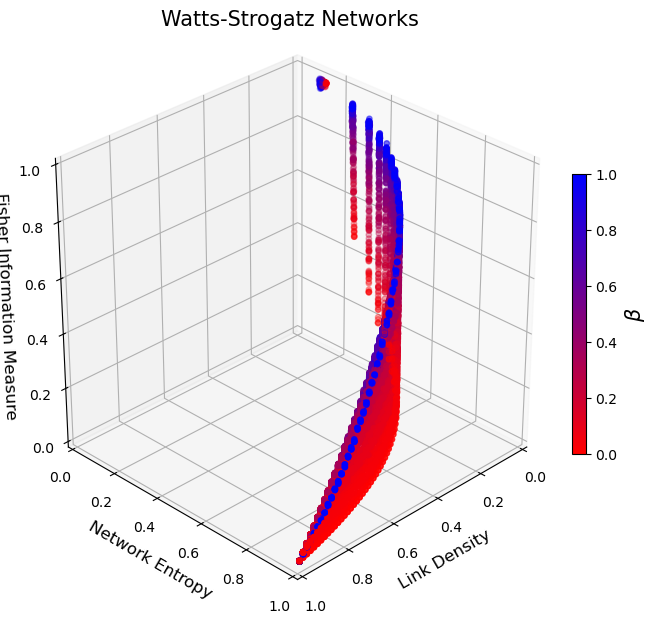

In [142]:
# Create a figure with adjusted size
fig = plt.figure(figsize=(21, 7), dpi=100)

# Add 3D subplot with adjusted size
ax = fig.add_subplot(111, projection='3d')

# Define a custom colormap
colors = [(1, 0, 0), (0, 0, 1)]  # Red to Blue
n_bins = 100
cmap_name = 'red_blue'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the scatter points
for i in range(ws_link_density.shape[0]):
    scatter = ax.scatter(ws_link_density[i, :], ws_network_entropy[i, :],ws_fisher_information_measure[i, :],
                         c=np.full(ws_link_density.shape[1], p[i]), s=15, cmap=custom_cmap, vmin=0, vmax=1)

# Adjust view angle
ax.view_init(30, 45)

# Set limits for each axis
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)
ax.set_zlim(bottom=0, top=1)

# Set labels and title
ax.set_xlabel(r'Link Density', fontsize=12)
ax.set_ylabel(r'Network Entropy',fontsize=12)
ax.set_zlabel(r'Fisher Information Measure', fontsize=12)
ax.set_aspect('equal')
ax.set_title(r'Watts-Strogatz Networks', fontsize=15)

# Add color bar with adjusted pad
color_bar = fig.colorbar(scatter, shrink=0.5, pad=0.001)
color_bar.set_label(r'$\beta$', fontsize=15)

# Adjust layout to ensure everything fits properly
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show plot
plt.show()

### Barabási-Albert: redes sem escala ###

#### *Preferential attachment* ####

Redes sem escala são aquelas que possuem uma distribuição de grau que segue uma lei de potência, ou seja, $P(k) \sim k^{-\gamma}$, onde $\gamma$ é o expoente de grau que usualmente possui valor $2 \leq \gamma \leq 3$.

O crescimento dessa redes ocorre a cada passo de tempo $t$, onde novos vértices são inseridos com $m$ conexões com os $N_0$ vértices existentes na rede. Essas conexões ocorre de acordo com uma probabilidade dada por uma conexão preferencial: a probabilidade de um vértice $i$ se conectar com $j$ é proporcional ao grau atual do vértice $i$, mais especificamente, temos
$$
{\Pi }^{(i)}=\frac{{k}_{i}}{{\sum }_{j}\,{k}_{j}}.
$$

Assim, essa conexão preferencial induz a formação de *hubs* (vértices altamente conectados) e comunidades periféricas de vértices com grau similar.

Nesse modelo, iremos gerar redes com $N = 10^2$ vértices e variar o número de arestas $M \in \{1, 2, \dots, 99 \}$ que são preferencialmente conectadas aos vértices existentes com maior grau.

In [143]:
N = 100
m = np.arange(1,100,1)

link_density = []
network_entropy = []
fisher_information_measure = []

for j in m:
  G = generate_barabasi_albert(N,j)
  link_density.append(nx.density(G))
  network_entropy.append(shannon_entropy(G))
  fisher_information_measure.append(fisher_information(G))

ba_link_density = np.array(link_density)
ba_network_entropy = np.array(network_entropy)
ba_fisher_information_measure = np.array(fisher_information_measure)

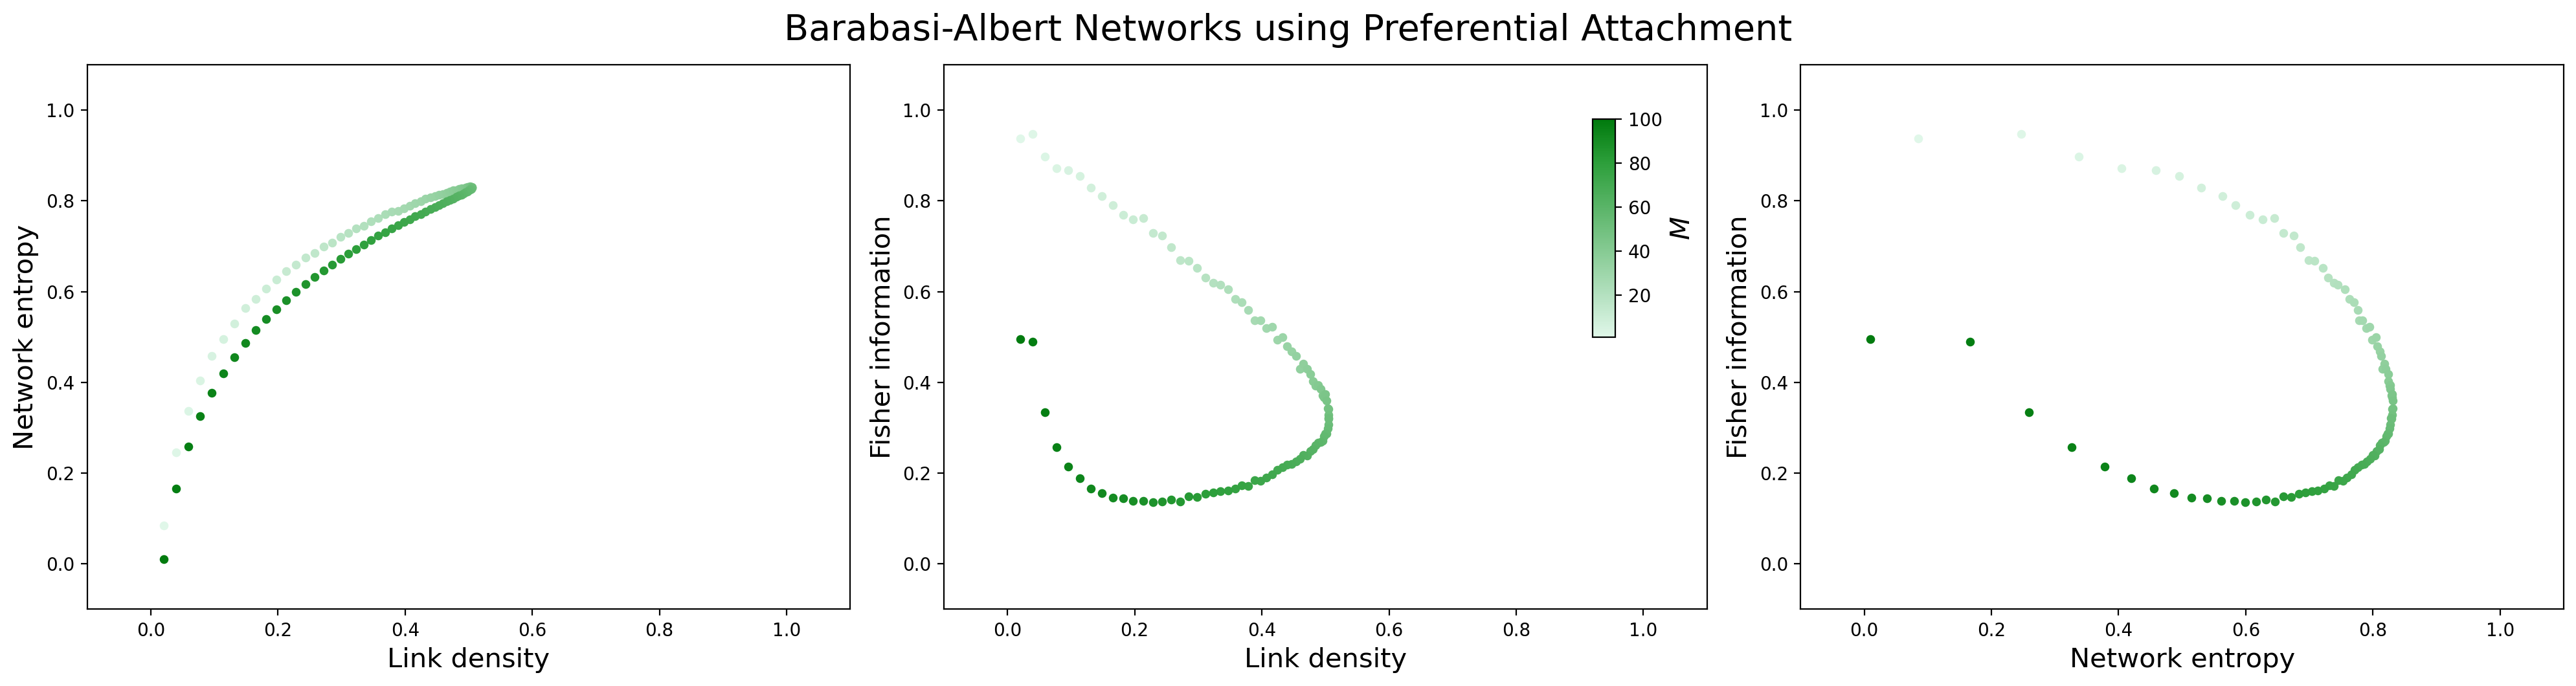

In [145]:
colors = ["#e0f7e9", "#b2e0be", "#85ca92", "#59b467", "#2d9f3b", "#007a0d"]
cmap_name = 'light_to_dark_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

for i in range(ba_link_density.shape[0]):
    scatter = axes[0].scatter(ba_link_density[i], ba_network_entropy[i], c= m[i], s = 15,
                         cmap=custom_cmap, vmin=1, vmax=100)
axes[0].set_xlabel(r'Link density', fontsize=15)
axes[0].set_ylabel(r'Network entropy', fontsize=15)
axes[0].set_xlim(-0.1, 1.1)
axes[0].set_ylim(-0.1, 1.1)

for i in range(ba_link_density.shape[0]):
    scatter = axes[1].scatter(ba_link_density[i], ba_fisher_information_measure[i], c=m[i], s = 15,
                         cmap=custom_cmap, vmin=1, vmax=100)
axes[1].set_xlabel(r'Link density', fontsize=15)
axes[1].set_ylabel(r'Fisher information', fontsize=15)
axes[1].set_xlim(-0.1, 1.1)
axes[1].set_ylim(-0.1, 1.1)

for i in range(ba_link_density.shape[0]):
    scatter = axes[2].scatter(ba_network_entropy[i], ba_fisher_information_measure[i] ,c=m[i], s = 15,
                         cmap=custom_cmap, vmin=1, vmax=100)
axes[2].set_xlabel(r'Network entropy', fontsize=15)
axes[2].set_ylabel(r'Fisher information', fontsize=15)
axes[2].set_xlim(-0.1, 1.1)
axes[2].set_ylim(-0.1, 1.1)

plt.tight_layout()
fig.suptitle(r'Barabasi-Albert Networks using Preferential Attachment',y=1.05 ,fontsize=20)
cax = inset_axes(axes[1], width="3%", height="40%", loc='lower left', bbox_to_anchor=(0.85, 0.5, 1, 1),
                   bbox_transform=axes[1].transAxes, borderpad=0)
color_bar = fig.colorbar(scatter, cax=cax)
color_bar.set_label(r'$M$', fontsize=15)
plt.show()

#### *Non-linear preferential attachment* ####

Nesse modelo, é introduzido o expoente $\alpha$ na probabilidade de conexão. Desse modo, a probabilidade de um vértice $i$ se conectar com um novo vértice $j$ é dada por
$$
{\Pi }^{(i)}=\frac{{k}_{i}^{\alpha }}{{\sum }_{j}\,{k}_{j}^{\alpha }}.
$$

Iremos gerar redes com $N = 10^2$ vértices e manteremos fixo o número de conexões $M = 2$ para termos uma densidade de conexões baixa. Então, observaremos o comportamente das medidas ao variar o expoente $\alpha \in \{0, 0.01, \dots, 2.99, 3 \}$.  

In [178]:
N = 100
m = 2
alpha = np.arange(0, 3, 0.01)

link_density = []
network_entropy = []
fisher_information_measure = []

for j in alpha:
    G = generate_barabasi_albert_nonlinear(N, m, j)
    link_density.append(nx.density(G))
    network_entropy.append(shannon_entropy(G))
    fisher_information_measure.append(fisher_information(G))
    
npa_link_density = np.array(link_density)
npa_network_entropy = np.array(network_entropy)
npa_fisher_information_measure = np.array(fisher_information_measure)

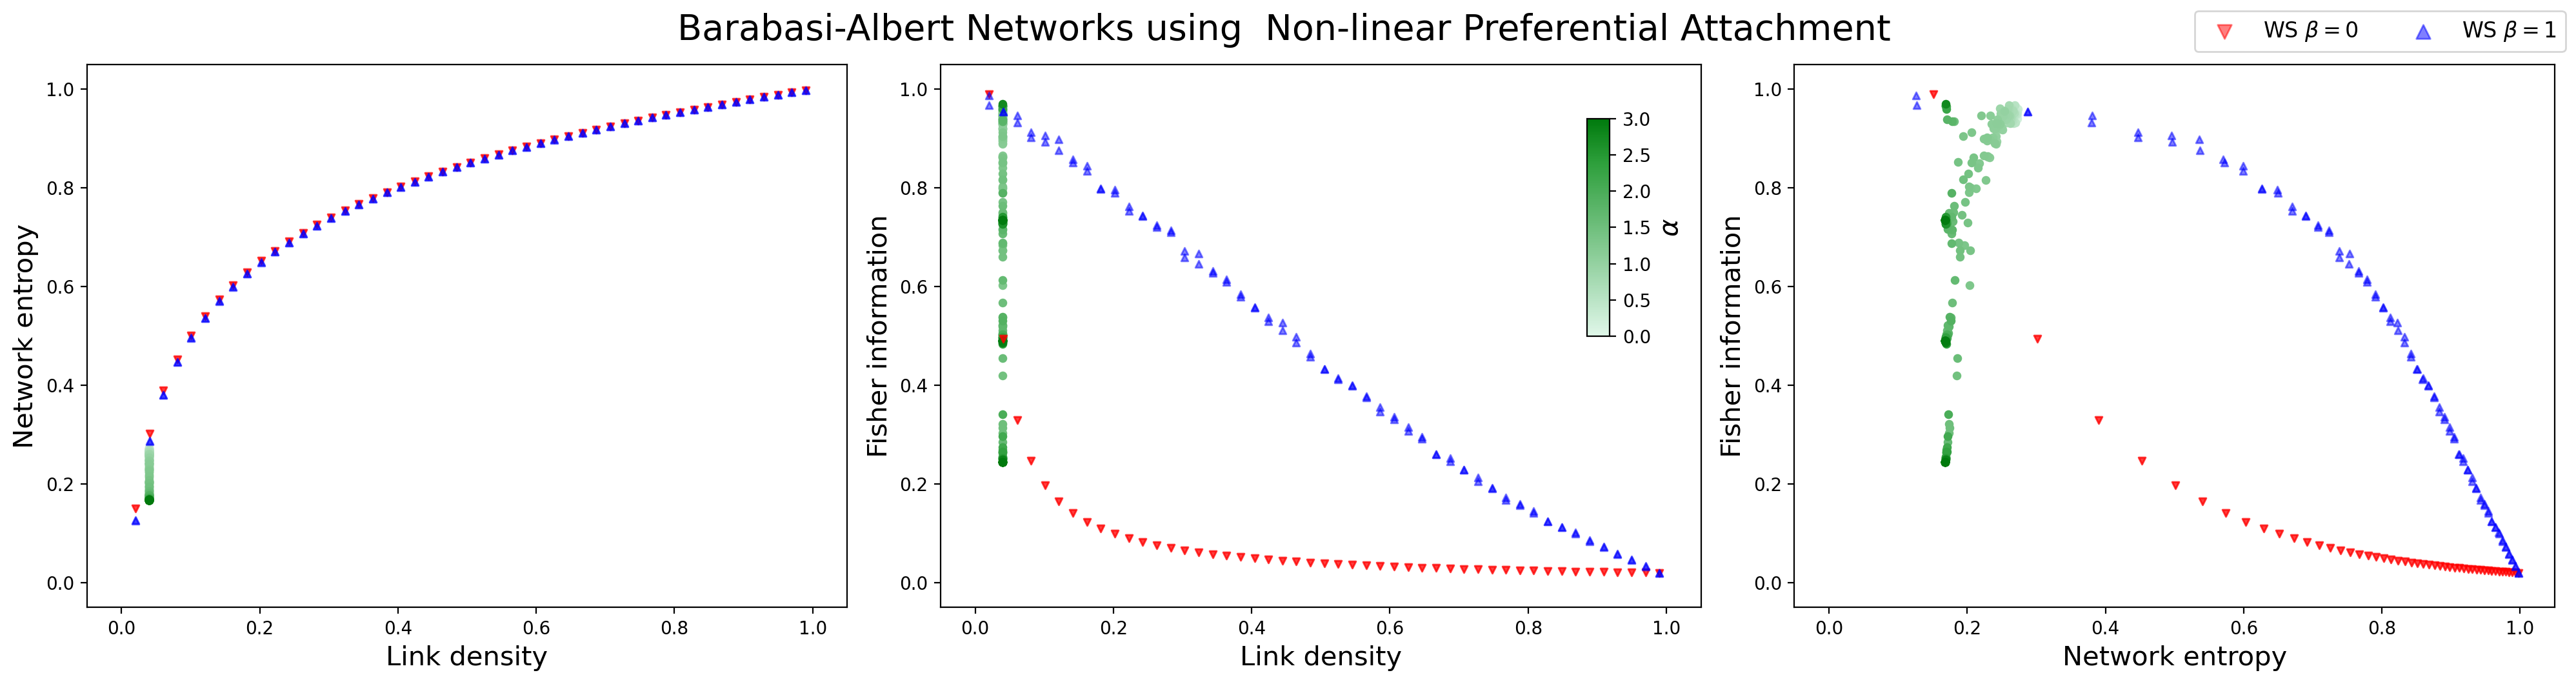

In [171]:
colors = ["#e0f7e9", "#b2e0be", "#85ca92", "#59b467", "#2d9f3b", "#007a0d"]
cmap_name = 'light_to_dark_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

for i in range(npa_link_density.shape[0]):
    scatter = axes[0].scatter(npa_link_density[i], npa_network_entropy[i], c= alpha[i], s = 15,
                         cmap=custom_cmap, vmin=0, vmax=3)
axes[0].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_network_entropy[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5)
axes[0].scatter(ws_link_density[(shape_ws-1),:], ws_network_entropy[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5)
axes[0].set_xlabel(r'Link density', fontsize=15)
axes[0].set_ylabel(r'Network entropy', fontsize=15)
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)

for i in range(npa_link_density.shape[0]):
    scatter = axes[1].scatter(npa_link_density[i], npa_fisher_information_measure[i], c=alpha[i], s = 15,
                         cmap=custom_cmap, vmin=0, vmax=3)
axes[1].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:],
                c='red',marker='v', s =15, alpha=0.5, label=r'WS $\beta = 0$')
axes[1].scatter(ws_link_density[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:],
                c='blue', marker='^', s =15, alpha=0.5, label=r'WS $\beta = 1$')
axes[1].set_xlabel(r'Link density', fontsize=15)
axes[1].set_ylabel(r'Fisher information', fontsize=15)
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)

for i in range(npa_link_density.shape[0]):
    scatter = axes[2].scatter(npa_network_entropy[i], npa_fisher_information_measure[i] ,c=alpha[i], s = 15,
                         cmap=custom_cmap, vmin=0, vmax=3)
axes[2].scatter(ws_network_entropy[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:],
                c='red',marker='v', s =15, alpha=0.5)
axes[2].scatter(ws_network_entropy[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:], 
                c='blue', marker='^', s =15, alpha=0.5)
axes[2].set_xlabel(r'Network entropy', fontsize=15)
axes[2].set_ylabel(r'Fisher information', fontsize=15)
axes[2].set_xlim(-0.05, 1.05)
axes[2].set_ylim(-0.05, 1.05)

plt.tight_layout()
fig.suptitle(r'Barabasi-Albert Networks using  Non-linear Preferential Attachment',y=1.05 ,fontsize=20)
cax = inset_axes(axes[1], width="3%", height="40%", loc='lower left', bbox_to_anchor=(0.85, 0.5, 1, 1),
                   bbox_transform=axes[1].transAxes, borderpad=0)
color_bar = fig.colorbar(scatter, cax=cax)
color_bar.set_label(r'$\alpha$', fontsize=15)
fig.legend(loc='upper right', ncol=2,  prop={'size': 12}, markerscale=2)
plt.show()

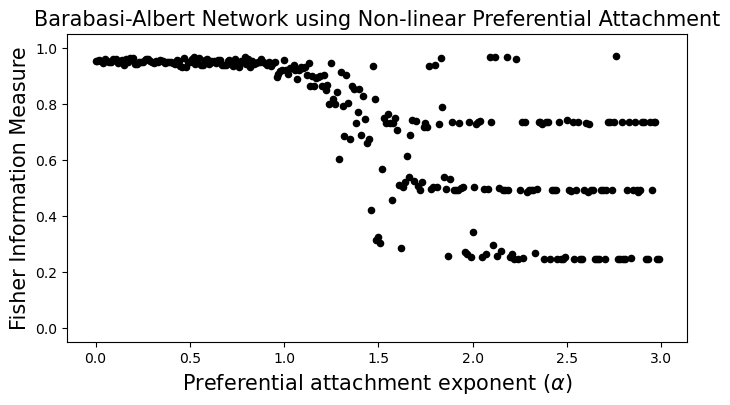

In [151]:
plt.figure(figsize=(8,4))
plt.scatter(alpha,npa_fisher_information_measure, color='k', s=20)
plt.title(r"Barabasi-Albert Network using Non-linear Preferential Attachment", fontsize=15)
plt.xlabel(r"Preferential attachment exponent ($\alpha$)", fontsize=15)
plt.ylabel(r"Fisher Information Measure", fontsize=15)
plt.ylim(-0.05,1.05)
plt.show()

Primeiramente, para obtermos uma melhor comparação desse modelo com o anterior, adicionamos em todos os gráficos as curvas de $\beta =0$ e $\beta=1$ medidas no modelo de WS.

Analisando a entropia pela densidade de conexões, vemos que a entropia diminui ao aumentarmos o expoente $\alpha$. Já para a Medida de Informação de Fisher contra a densidade de conexões, obtemos resultados confusos. Nota-se que a partir de um certo valor de $\alpha$ a medida começa a oscilar, o que fica evidenciado no gráfico logo acima.

#### Fitness property ####

Para reproduzir a característica de alguns vértices de terem uma maior facilidade para criar conexões, utilizaremos o modelo de Bianconi-Barabási, o qual descreve essa propriedade chamada de *fitness*. Adaptamos o modelo de conexão preferencial adicionando um coeficiente junto ao grau do vértice, mais precisamente, temos
$$
{\Pi }^{(i)}=\frac{{\eta }_{i}{k}_{i}}{{\sum }_{j}\,{\eta }_{j}{k}_{j}}.
$$

Para realizar as medidas, geramos 30 redes com $N = 10^2$ vértices e consideramos uma distribuição uniforme da *fitness* $\eta_i$ de cada vértice.

Os resultados obtidos mostram consistência entre o modelo não-linear e o modelo com a *fitness*. É possível notar as medidas realizadas nas redes geradas pelo modelo de *fitness* se encontram na mesma região que os resultados obtidos no modelo não-linear.

In [169]:
N = 1000
m = 2

link_density = []
network_entropy = []
fisher_information_measure = []

for j in range(30):
  G = generate_bianconi_barabasi(N,m)
  link_density.append(nx.density(G))
  network_entropy.append(shannon_entropy(G))
  fisher_information_measure.append(fisher_information(G))

fp_link_density = np.array(link_density)
fp_network_entropy = np.array(network_entropy)
fp_fisher_information_measure = np.array(fisher_information_measure)

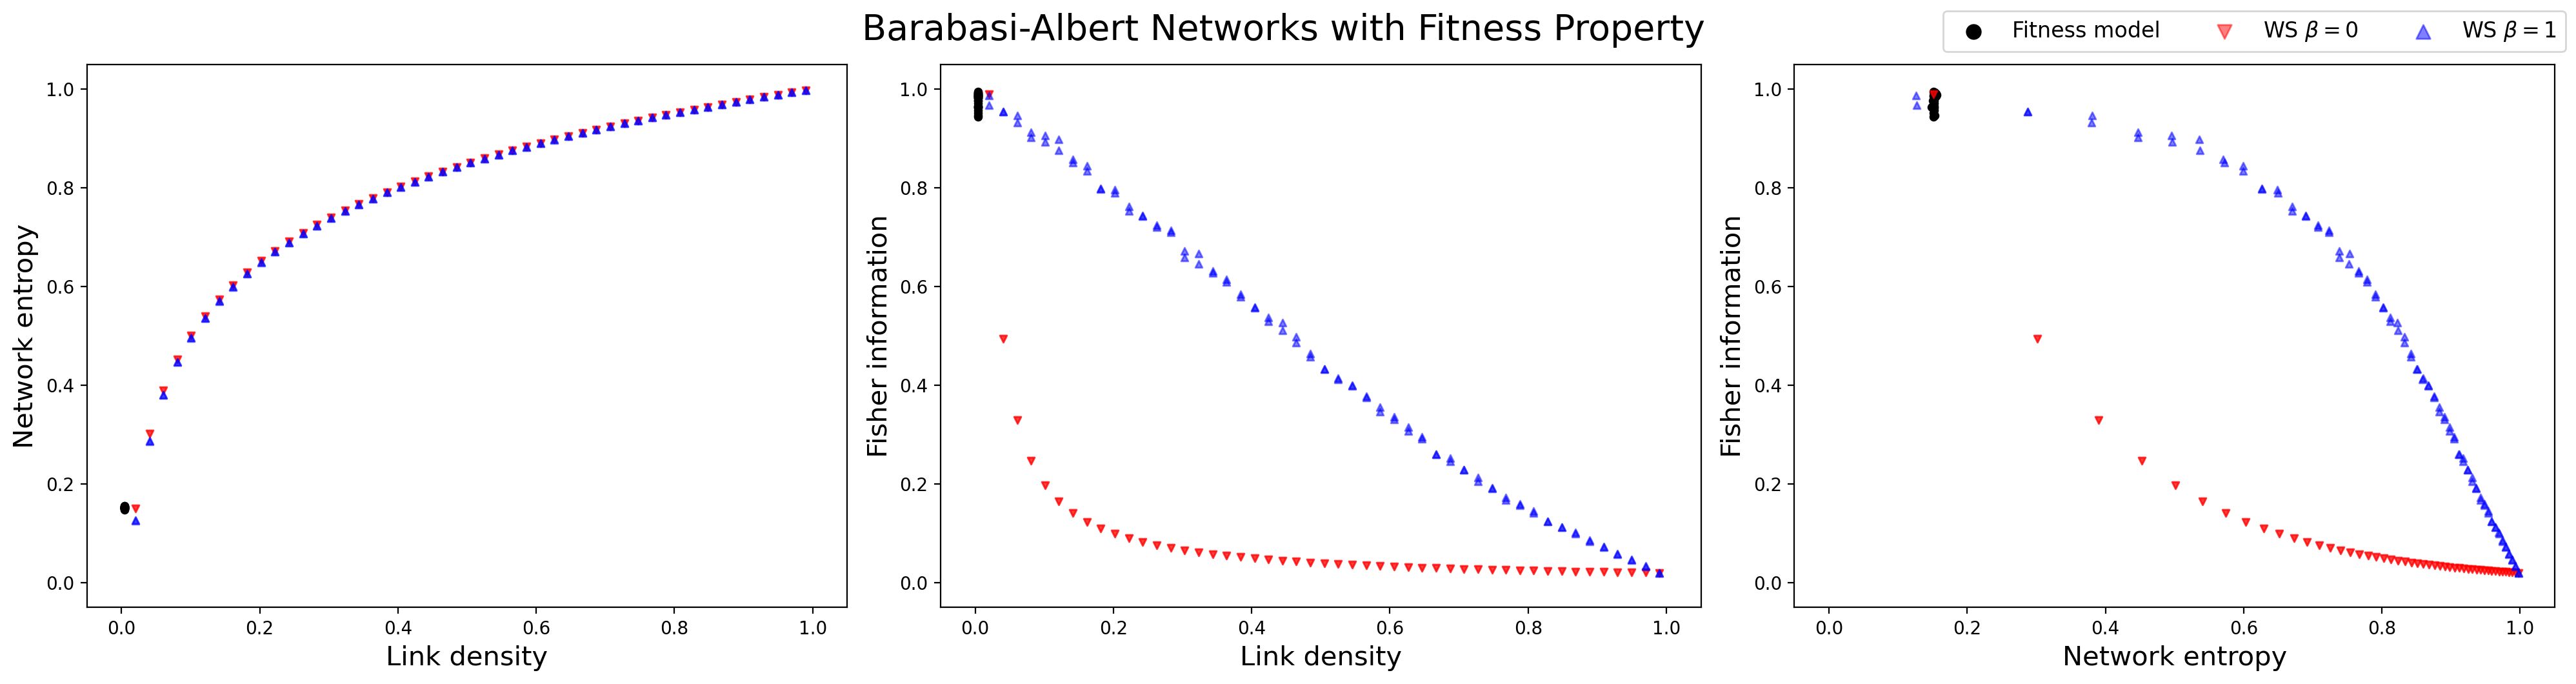

In [181]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

scatter = axes[0].scatter(fp_link_density[:], fp_network_entropy[:], c='k', s = 15, label='Fitness model')
axes[0].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_network_entropy[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5, label=r'WS $\beta = 0$')
axes[0].scatter(ws_link_density[(shape_ws-1),:], ws_network_entropy[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5, label=r'WS $\beta = 1$')
axes[0].set_xlabel(r'Link density', fontsize=15)
axes[0].set_ylabel(r'Network entropy', fontsize=15)
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)

scatter = axes[1].scatter(fp_link_density[:], fp_fisher_information_measure[:], c='k', s = 15)
axes[1].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5)
axes[1].scatter(ws_link_density[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5)
axes[1].set_xlabel(r'Link density', fontsize=15)
axes[1].set_ylabel(r'Fisher information', fontsize=15)
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)

scatter = axes[2].scatter(fp_network_entropy[:], fp_fisher_information_measure[:] ,c='k', s = 15)
axes[2].scatter(ws_network_entropy[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5)
axes[2].scatter(ws_network_entropy[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5)
axes[2].set_xlabel(r'Network entropy', fontsize=15)
axes[2].set_ylabel(r'Fisher information', fontsize=15)
axes[2].set_xlim(-0.05, 1.05)
axes[2].set_ylim(-0.05, 1.05)

plt.tight_layout()
fig.suptitle(r'Barabasi-Albert Networks with Fitness Property',y=1.05 ,fontsize=20)
fig.legend(loc='upper right', ncol=3,  prop={'size': 12}, markerscale=2)
plt.show()

#### *Aging property* ####

Nesse modelo, consideraremos a propriedade de envelhecimento na rede. Esse processo faz com que um vértice quando começa a diminuir a sua taxa de novas conexões perca sua relevância, causando mudanças na estrutura da rede. Essa propriedade é modelado ao considerar
$$
{\Pi }^{(i)}({k}_{i},t-{t}_{i}) \sim k{(t-{t}_{i})}^{-\nu },
$$
onde $\nu$ é um parâmetro que controla o envelhecimento de um vértice.

Para avaliar esse modelo, iremos gerar redes com $N = 10^2$ vértices e variar o parâmetro de envelhecimento $\nu \in \{-3,-2.99, \dots, 2.99,3\}$.

In [184]:
N = 100
m = 2
ni = np.arange(-3, 3.01, 0.01)

link_density = []
network_entropy = []
fisher_information_measure = []

for j in ni:
    G = barabasi_albert_with_aging(N, m, j)
    link_density.append(nx.density(G))
    network_entropy.append(shannon_entropy(G))
    fisher_information_measure.append(fisher_information(G))
    
ap_link_density = np.array(link_density)
ap_network_entropy = np.array(network_entropy)
ap_fisher_information_measure = np.array(fisher_information_measure)

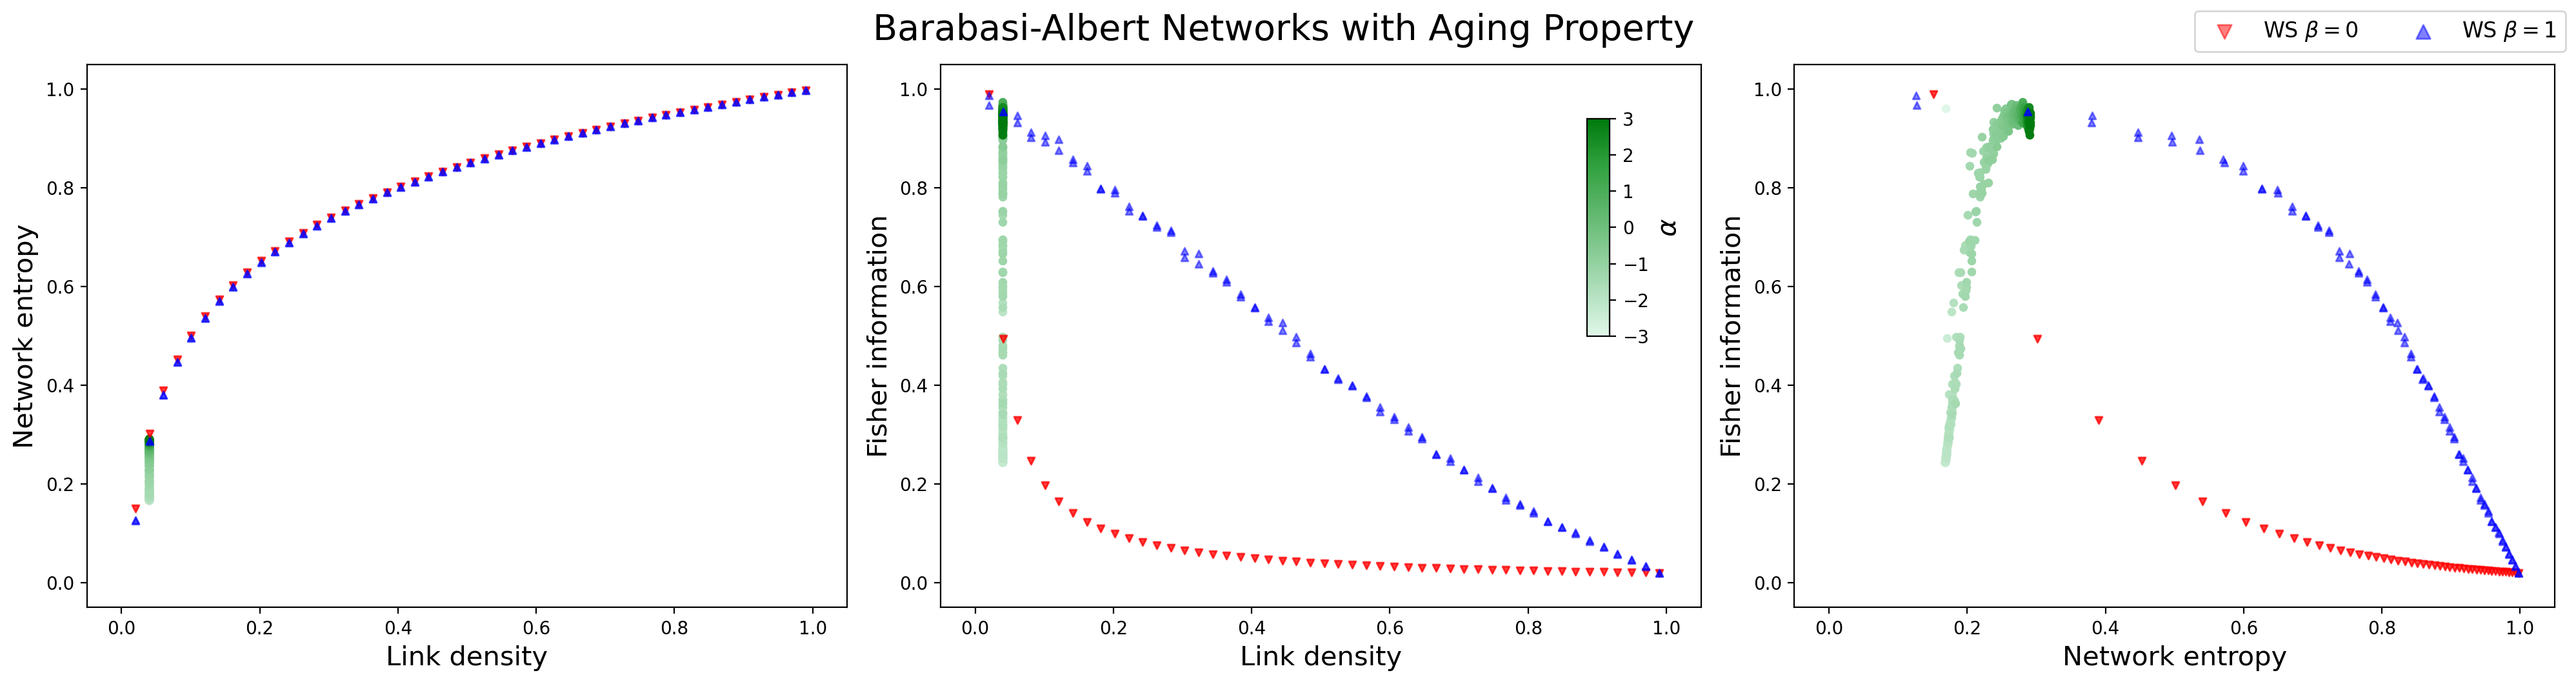

In [185]:
colors = ["#e0f7e9", "#b2e0be", "#85ca92", "#59b467", "#2d9f3b", "#007a0d"]
cmap_name = 'light_to_dark_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

for i in range(ap_link_density.shape[0]):
    scatter = axes[0].scatter(ap_link_density[i], ap_network_entropy[i], c= ni[i], s = 15,
                         cmap=custom_cmap, vmin=-3, vmax=3)
axes[0].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_network_entropy[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5)
axes[0].scatter(ws_link_density[(shape_ws-1),:], ws_network_entropy[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5)
axes[0].set_xlabel(r'Link density', fontsize=15)
axes[0].set_ylabel(r'Network entropy', fontsize=15)
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)

for i in range(ap_link_density.shape[0]):
    scatter = axes[1].scatter(ap_link_density[i], ap_fisher_information_measure[i], c=ni[i], s = 15,
                         cmap=custom_cmap, vmin=-3, vmax=3)
axes[1].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:],
                c='red',marker='v', s =15, alpha=0.5, label=r'WS $\beta = 0$')
axes[1].scatter(ws_link_density[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:],
                c='blue', marker='^', s =15, alpha=0.5, label=r'WS $\beta = 1$')
axes[1].set_xlabel(r'Link density', fontsize=15)
axes[1].set_ylabel(r'Fisher information', fontsize=15)
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)

for i in range(ap_link_density.shape[0]):
    scatter = axes[2].scatter(ap_network_entropy[i], ap_fisher_information_measure[i] ,c=ni[i], s = 15,
                         cmap=custom_cmap, vmin=-3, vmax=3)
axes[2].scatter(ws_network_entropy[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:],
                c='red',marker='v', s =15, alpha=0.5)
axes[2].scatter(ws_network_entropy[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:], 
                c='blue', marker='^', s =15, alpha=0.5)
axes[2].set_xlabel(r'Network entropy', fontsize=15)
axes[2].set_ylabel(r'Fisher information', fontsize=15)
axes[2].set_xlim(-0.05, 1.05)
axes[2].set_ylim(-0.05, 1.05)

plt.tight_layout()
fig.suptitle(r'Barabasi-Albert Networks with Aging Property',y=1.05 ,fontsize=20)
cax = inset_axes(axes[1], width="3%", height="40%", loc='lower left', bbox_to_anchor=(0.85, 0.5, 1, 1),
                   bbox_transform=axes[1].transAxes, borderpad=0)
color_bar = fig.colorbar(scatter, cax=cax)
color_bar.set_label(r'$\alpha$', fontsize=15)
fig.legend(loc='upper right', ncol=2,  prop={'size': 12}, markerscale=2)
plt.show()

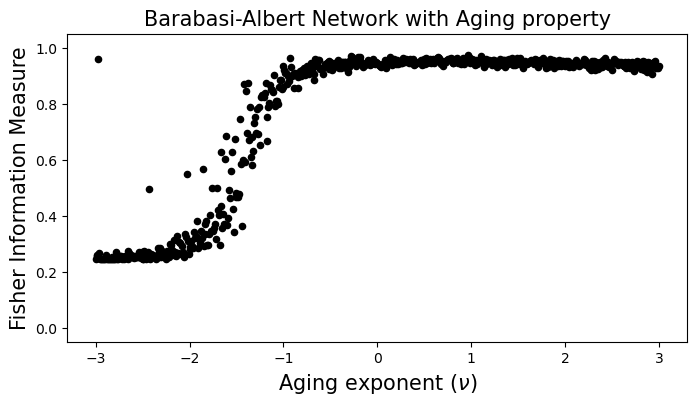

In [188]:
plt.figure(figsize=(8,4))
plt.scatter(ni,ap_fisher_information_measure, color='k', s=20)
plt.title(r"Barabasi-Albert Network with Aging property", fontsize=15)
plt.xlabel(r"Aging exponent ($\nu$)", fontsize=15)
plt.ylabel(r"Fisher Information Measure", fontsize=15)
plt.ylim(-0.05,1.05)
plt.show()

Vemos que os resultados obtidos para esse modelo também são bastante semelhantes aos do modelo não-linear. Nesse caso, a Medida de Informação de Fisher começa estável em um valor baixo, sobre rapidamente e se estabiliza novamente.

#### *Configuration model* ####

Neste modelo, provemos uma distribuição de grau $P(k)$ e é gerada uma rede aleatória que obedece essa distribuição. Mais especificamente, é utilizada uma sequência de grau para gerar a rede, sendo essa sequência de grau uma lista contendo o grau de cada vértice da rede.

Como estamos tentanto reproduzir propriedades de redes livre de escala usando o modelo de configuração, utilizaremos uma distribuição em lei de potência para designar os graus dos vértices, ou seja, $P(k) = k^{-\gamma}$, com $\gamma \in [2,5]$.

Então, geramos redes com $N=10^2$ utlizando uma lei de potência com $\gamma \in \{2, 2.1, \dots, 4.9, 5\} para realizar as medidas.

In [200]:
N = 100
gama = np.arange(2,5.1,0.1)

link_density = []
network_entropy = []
fisher_information_measure = []

for j in gama:
  aux = []
  aux2 = []
  aux3 = []
  for i in range(30):
    G = generate_configuration_model(N,j)
    aux.append(nx.density(G))
    aux2.append(shannon_entropy(G))
    aux3.append(fisher_information(G))
  link_density.append(aux)
  network_entropy.append(aux)
  fisher_information_measure.append(aux)

cm_link_density = np.array(link_density)
cm_network_entropy = np.array(network_entropy)
cm_fisher_information_measure = np.array(fisher_information_measure)

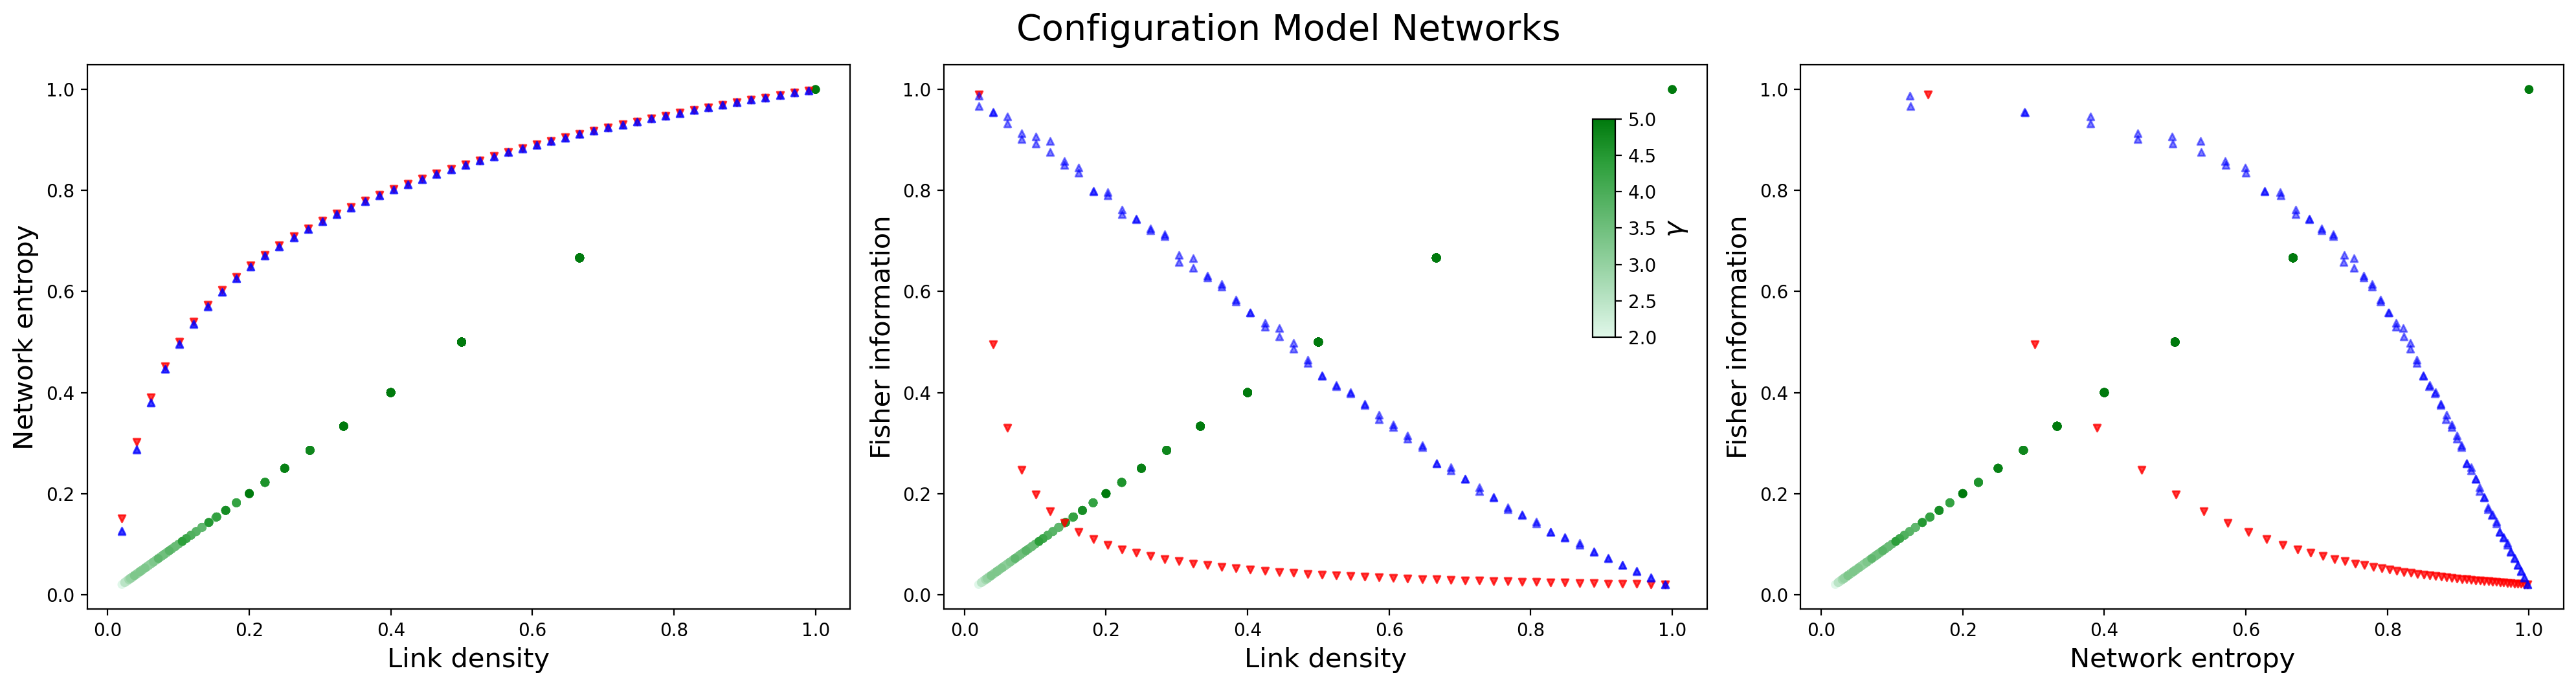

In [203]:
colors = ["#e0f7e9", "#b2e0be", "#85ca92", "#59b467", "#2d9f3b", "#007a0d"]
cmap_name = 'light_to_dark_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

for i in range(cm_link_density.shape[0]):
    scatter = axes[0].scatter(cm_link_density[i], cm_network_entropy[i], c= np.full(cm_link_density.shape[1],gama[i]), s = 15,
                         cmap=custom_cmap, vmin=2, vmax=5)
axes[0].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_network_entropy[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5, label=r'WS $\beta = 0$')
axes[0].scatter(ws_link_density[(shape_ws-1),:], ws_network_entropy[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5, label=r'WS $\beta = 1$')
axes[0].set_xlabel(r'Link density', fontsize=15)
axes[0].set_ylabel(r'Network entropy', fontsize=15)

for i in range(cm_link_density.shape[0]):
    scatter = axes[1].scatter(cm_link_density[i], cm_fisher_information_measure[i], c=np.full(cm_link_density.shape[1],gama[i]), s = 15,
                         cmap=custom_cmap, vmin=2, vmax=5)
axes[1].scatter(ws_link_density[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5, label=r'WS $\beta = 0$')
axes[1].scatter(ws_link_density[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5, label=r'WS $\beta = 1$')
axes[1].set_xlabel(r'Link density', fontsize=15)
axes[1].set_ylabel(r'Fisher information', fontsize=15)

for i in range(cm_link_density.shape[0]):
    scatter = axes[2].scatter(cm_network_entropy[i], cm_fisher_information_measure[i] ,c=np.full(cm_link_density.shape[1],gama[i]), s = 15,
                         cmap=custom_cmap, vmin=2, vmax=5)
axes[2].scatter( ws_network_entropy[(shape_ws-shape_ws),:], ws_fisher_information_measure[(shape_ws-shape_ws),:], 
                c='red',marker='v', s =15, alpha=0.5, label=r'WS $\beta = 0$')
axes[2].scatter( ws_network_entropy[(shape_ws-1),:], ws_fisher_information_measure[(shape_ws-1),:], 
                c='blue',marker='^', s =15, alpha=0.5, label=r'WS $\beta = 1$')
axes[2].set_xlabel(r'Network entropy', fontsize=15)
axes[2].set_ylabel(r'Fisher information', fontsize=15)

plt.tight_layout()
fig.suptitle(r'Configuration Model Networks',y=1.05 ,fontsize=20)
cax = inset_axes(axes[1], width="3%", height="40%", loc='lower left', bbox_to_anchor=(0.85, 0.5, 1, 1),
                   bbox_transform=axes[1].transAxes, borderpad=0)
color_bar = fig.colorbar(scatter, cax=cax)
color_bar.set_label(r"$\gamma$", fontsize=15)
plt.show()

Conforme pode ser observado nas figuras acima, obtemos um comportamento linear para a Entropia e para a Medida de Informação de Fisher. Tal resultado difere dos resultados obtidos pelos modelos utilizados anteriormente.

## Conclusões ##

Nesse trabalho, foi utilizado a Teoria da Informação para quantificar a complexidade e a informação contida em uma rede. Essa abordagem permite um maior entendimento das propriedades estruturais e da dinâmica das redes, que podem passar as medidas tradicionais podem ignorar. Mais especificamente, foi utilizada a Entropia de Shannon para quantificar a aleatoridade dentro da rede e a Medida de Informação de Fisher avalia a quantidade de informação compartilhada entre a rede.

Ao comparar essas medidas para diferentes redes, foi possível notar que cada tipo de rede exibe uma característica informacional distinta. Tal característica se mostrou única para as redes sintéticas utilizadas nesse trabalho: Érdõs-Renyi, Watts-Strogatz e Barabási-Albert. Para redes do tipo de Barabási-Albert, foram feitas medidas para diferentes tipos de modelo de fixação preferencial e todas apresentaram a mesma característica, com exceção do modelo configuracional.

Portanto, ao integrarmos a Teoria da Informação na análise de redes, obtemos um ótimo método para caracterizar as redes complexas. Além disso, pode-se avaliar o espalhamento de informações e a robustez da rede.